In [1]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
df.shape

(1460, 81)

In [3]:
tst = pd.read_csv("test.csv")
tst.shape

(1459, 80)

In [4]:
target = df['SalePrice']

In [5]:
df.drop(['SalePrice'],axis=1,inplace=True)

In [6]:
#df["LotFrontage"].replace("NaN",df['LotFrontage'].median(), inplace=True)
df["LotFrontage"].fillna(df["LotFrontage"].median(), inplace = True)

In [7]:
df.drop(["Alley","PoolQC","Fence","MiscFeature",'FireplaceQu'], axis=1, inplace=True)

In [8]:
df.shape

(1460, 75)

C:\Users\chira\AppData\Local\Temp/ipykernel_1212/2225569098.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),


<AxesSubplot:>

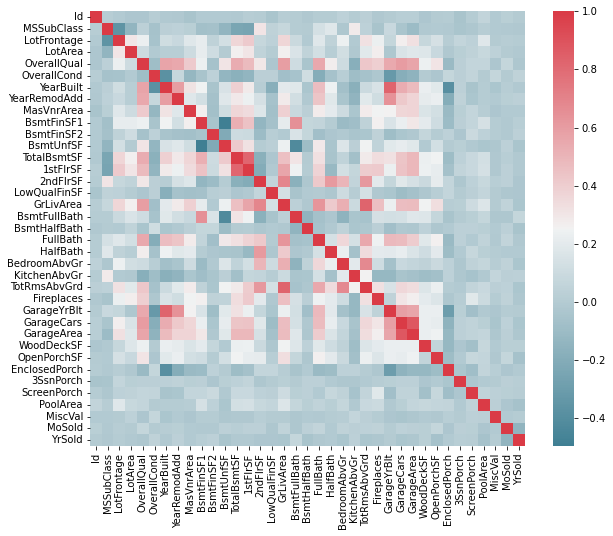

In [9]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

C:\Users\chira\AppData\Local\Temp/ipykernel_1212/1378154487.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),


<AxesSubplot:>

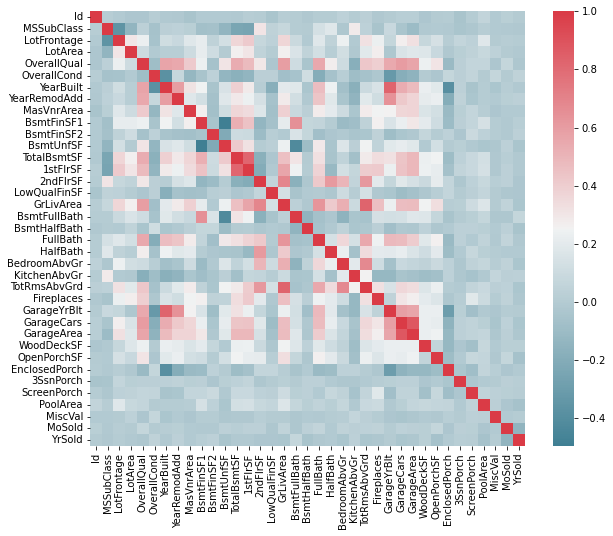

In [10]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

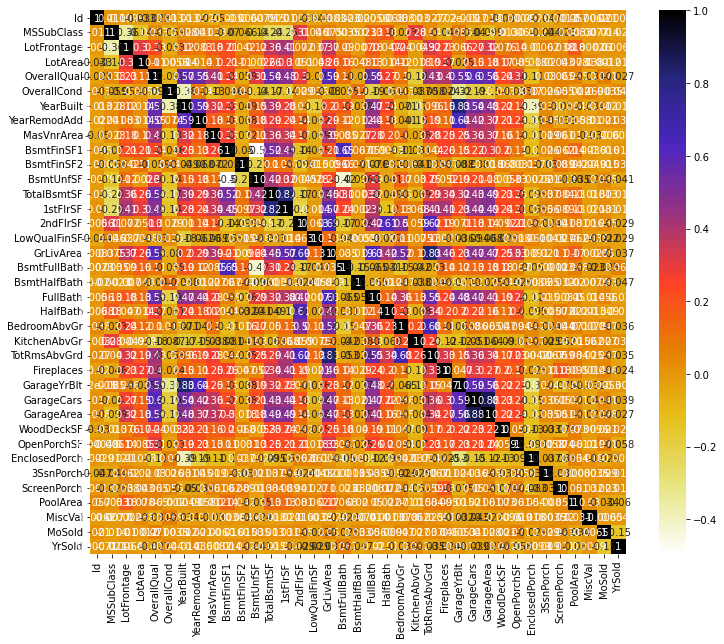

In [11]:

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [12]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [13]:
corr_features = correlation(df, 0.8)
len(set(corr_features))

4

In [14]:
corr_features

{'1stFlrSF', 'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd'}

In [15]:
numerical = []

for i in df.columns[1:] :
    
    if( df[i].dtype != object ) :
        numerical.append(i)
    

In [16]:
# for i in numerical : 
# upper_limit = df[numerical].mean() + 1*df[numerical].std()
# lower_limit = df[numerical].mean() - 1*df[numerical].std() 
# df = df[(df[numerical] > lower_limit) & (df[numerical] < upper_limit)]

In [17]:
# for i in numerical :
    
#     Q1 = df[i].quantile(.25)
#     Q3 = df[i].quantile(.75)
#     IQR = Q3 - Q1
#     lower_limit = Q1 - 1.5*IQR
#     upper_limit = Q3 + 1.5*IQR
#     df = df[(df[i] > lower_limit) & (df[i] < upper_limit)]

In [18]:
df.shape

(1460, 75)

In [19]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
#imputer.fit(df['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageQual','GarageCond'].values)
#df['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageQual','GarageCond'] = imputer.transform(df['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageQual','GarageCond'].values)
imputer.fit(df.iloc[:,[24,29,30,31,32,34,41,56,58,61,62]].values)
df.iloc[:,[24,29,30,31,32,34,41,56,58,61,62]] = imputer.transform(df.iloc[:,[24,29,30,31,32,34,41,56,58,61,62]].values)

In [20]:
imputer2 = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer2.fit(df.iloc[:,[25,57]].values)
df.iloc[:,[25,57]] = imputer2.transform(df.iloc[:,[25,57]].values)

In [21]:
tst["LotFrontage"].fillna(tst["LotFrontage"].median(), inplace = True)

In [22]:
tst.drop(["Alley","PoolQC","Fence","MiscFeature",'FireplaceQu'], axis=1, inplace=True)

In [23]:
imputer.fit(tst.iloc[:,[2,8,22,23,24,29,30,31,32,34,52,54,56,58,61,62,73]].values)
tst.iloc[:,[2,8,22,23,24,29,30,31,32,34,52,54,56,58,61,62,73]] = imputer.transform(tst.iloc[:,[2,8,22,23,24,29,30,31,32,34,52,54,56,58,61,62,73]].values)

In [24]:
imputer2.fit(tst.iloc[:,[25,33,35,36,37,46,47,57,59,60]].values)
tst.iloc[:,[25,33,35,36,37,46,47,57,59,60]] = imputer2.transform(tst.iloc[:,[25,33,35,36,37,46,47,57,59,60]].values)

In [25]:
df = pd.concat([df,tst],axis = 0)
df.shape
df.drop(corr_features,axis = 1,inplace=True)

In [26]:
yt = df.columns[df.isna().any()].tolist()

In [27]:
yt
for i in yt :
    print(i,df.columns.get_loc(i))

In [28]:
categorical = []

for i in df.columns :
    
    if( df[i].dtype == object ) :
        categorical.append(i)
    

In [29]:
print(len(categorical))

38


In [30]:
cat_fea = df.loc[:,['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']]

In [31]:
final_features = pd.get_dummies(cat_fea,drop_first=True)

In [32]:
final_features.shape

(2919, 196)

In [33]:
final_features

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1455,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1456,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1457,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [34]:
df = pd.concat([df,final_features],axis = 1)

In [35]:
df.drop(df.loc[:,['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']],axis = 1, inplace=True)


In [36]:
df.shape

(2919, 229)

In [37]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()

In [38]:
x_train = SC.fit_transform(df.iloc[:1460,1:])

In [39]:
x_test = SC.transform( df.iloc[1460:,1:])

In [40]:
# Principle Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [41]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 200, random_state = 0)
regressor.fit(x_train, target)
Y_pred = regressor.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score
regressor.score(x_train, target)
regressor = round(regressor.score(x_train,target) * 100, 2)
regressor

97.61

In [43]:
# mlr = LinearRegression()
# mlr.fit(df.iloc[:1460,1:],target)

In [44]:
# mlr.score(df.iloc[:1460,1:],target)

In [45]:
# ans = df.iloc[1460:,1:]

In [46]:
ans_p = pd.DataFrame({
    "Id":df.iloc[1460:,0],"SalePrice":Y_pred
})

In [47]:
ans_p

,Id,SalePrice
0,1461,121309.41
1,1462,155799.37
2,1463,180119.50
3,1464,202110.30
4,1465,193309.16
...,...,...
1454,2915,91598.50
1455,2916,91010.50
1456,2917,171823.25
1457,2918,131950.75


In [48]:
# final = {"Id":df.iloc[1460:,0],"SalePrice":ans_p}

In [49]:
df_final = pd.DataFrame(ans_p)

In [50]:
df_final.to_csv("ans.csv")